In [1]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION
        )  # Draw face connections

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS
        )  # Draw pose connections

    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS
        )  # Draw left hand connections

    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS
        )  # Draw right hand connections


In [5]:
def draw_styled_landmarks(image, results):
    # Draw face landmarks
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, results.face_landmarks,
            mp.solutions.face_mesh.FACEMESH_TESSELATION,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1), 
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        ) 

    # Draw pose landmarks
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, results.pose_landmarks,
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        ) 

    # Draw left hand
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.left_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        ) 

    # Draw right hand
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, results.right_hand_landmarks,
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4), 
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
if results.left_hand_landmarks:
    print(len(results.left_hand_landmarks.landmark))


21


In [8]:
results

mediapipe.python.solution_base.SolutionOutputs

In [9]:
draw_landmarks(frame, results)

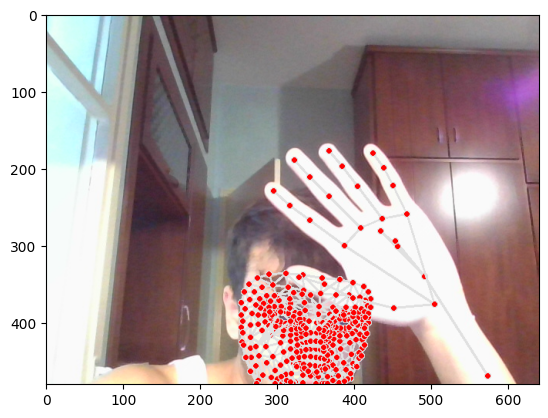

In [10]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [11]:
len(results.left_hand_landmarks.landmark)

21

In [12]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [13]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [14]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)


In [15]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [16]:
result_test = extract_keypoints(results)

In [17]:
result_test

array([ 0.55330294,  0.85033822, -0.58287907, ...,  0.        ,
        0.        ,  0.        ])

In [18]:
468*3+33*4+21*3+21*3

1662

In [21]:
# Actions that we try to detect
actions = np.array(['heart', 'muscle', 'hospital','first aid','burning','headache','pain','eat','drink','break'])

# Thirty videos worth of data
no_sequences = 42

# Videos are going to be 30 frames in length
sequence_length = 32

In [22]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [23]:
import os
import cv2
import numpy as np
import mediapipe as mp
from pathlib import Path

# Define actions (your word classes in Arabic)
actions = ['heart', 'muscle', 'hospital','first aid','burning','headache','pain','eat','drink','break']

# Define paths
DATASET_DIR = Path('train (3 signers)')
OUTPUT_DIR = Path('output_data (3 signers)')
OUTPUT_DIR.mkdir(parents=True, exist_ok=True)

# Initialize Mediapipe modules
mp_holistic = mp.solutions.holistic
mp_drawing = mp.solutions.drawing_utils

def mediapipe_detection(image, model):
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    results = model.process(image_rgb)
    return image, results

def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33 * 4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468 * 3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21 * 3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21 * 3)
    return np.concatenate([pose, face, lh, rh])

In [24]:
# Run Mediapipe
with mp_holistic.Holistic(static_image_mode=True, min_detection_confidence=0.5) as holistic:
    for action in actions:
        action_path = DATASET_DIR / action
        if not action_path.exists():
            print(f"Missing directory: {action_path}")
            continue

        for take in action_path.iterdir():
            if not take.is_dir():
                continue

            for frame_path in sorted(take.glob("*.jpg")):
                try:
                    with open(frame_path, 'rb') as f:
                        file_bytes = np.asarray(bytearray(f.read()), dtype=np.uint8)
                        frame = cv2.imdecode(file_bytes, cv2.IMREAD_COLOR)
                except Exception as e:
                    print(f"Error reading image: {frame_path} — {e}")
                    continue

                if frame is None:
                    print(f"Failed to load image: {frame_path}")
                    continue

                _, results = mediapipe_detection(frame, holistic)
                keypoints = extract_keypoints(results)

                save_path = OUTPUT_DIR / action / take.name
                save_path.mkdir(parents=True, exist_ok=True)

                frame_stem = frame_path.stem  # filename without extension
                np.save(save_path / frame_stem, keypoints)


In [25]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [26]:
label_map = {label:num for num, label in enumerate(actions)}

In [27]:
label_map

{'heart': 0,
 'muscle': 1,
 'hospital': 2,
 'first aid': 3,
 'burning': 4,
 'headache': 5,
 'pain': 6,
 'eat': 7,
 'drink': 8,
 'break': 9}

In [28]:
sequences, labels = [], []
for action in actions:
    action_path = os.path.join(OUTPUT_DIR, action)
    for take in sorted(os.listdir(action_path)):
        if take.startswith('.'):
            continue  # Skip .ipynb_checkpoints or other hidden folders

        take_path = os.path.join(action_path, take)
        frame_files = sorted([
            f for f in os.listdir(take_path)
            if f.endswith('.npy') and not f.startswith('.')
        ])
        
        print(f"{action}/{take} → {len(frame_files)} frames")

        if len(frame_files) < sequence_length:
            print(f"Skipping: {action}/{take} (only {len(frame_files)} frames)")
            continue

        window = []
        for frame_name in frame_files[:sequence_length]:
            path = os.path.join(take_path, frame_name)
            res = np.load(path)
            window.append(res)

        sequences.append(window)
        labels.append(label_map[action])


heart/03_01_0088_(01_12_16_16_47_40)_c → 39 frames
heart/03_01_0088_(01_12_16_16_47_44)_c → 41 frames
heart/03_01_0088_(01_12_16_16_47_48)_c → 39 frames
heart/03_01_0088_(01_12_16_16_47_53)_c → 51 frames
heart/03_01_0088_(01_12_16_16_47_57)_c → 50 frames
heart/03_01_0088_(01_12_16_16_48_09)_c → 41 frames
heart/03_01_0088_(01_12_16_16_48_13)_c → 40 frames
heart/03_01_0088_(01_12_16_16_48_18)_c → 42 frames
heart/03_01_0088_(01_12_16_16_48_22)_c → 44 frames
heart/03_01_0088_(01_12_16_16_48_26)_c → 34 frames
heart/03_01_0088_(01_12_16_16_48_30)_c → 45 frames
heart/03_01_0088_(01_12_16_16_48_35)_c → 43 frames
heart/03_01_0088_(01_12_16_16_48_39)_c → 42 frames
heart/03_01_0088_(01_12_16_16_48_52)_c → 41 frames
heart/03_01_0088_(01_12_16_16_48_57)_c → 42 frames
heart/03_01_0088_(01_12_16_16_49_01)_c → 40 frames
heart/03_01_0088_(01_12_16_16_49_05)_c → 44 frames
heart/03_01_0088_(01_12_16_16_49_14)_c → 40 frames
heart/03_01_0088_(01_12_16_16_49_18)_c → 44 frames
heart/03_01_0088_(01_12_16_16_4

In [29]:
X = np.array(sequences)
X.shape

(686, 32, 1662)

In [30]:
y = to_categorical(labels).astype(int)

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [172]:
actions = np.array(actions)
import tensorflow as tf
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import LSTM, Dense, Dropout, LayerNormalization, GlobalAveragePooling1D, Bidirectional

num_classes = actions.shape[0]
'''
model = Sequential([
    Input(shape=(30, 1662)),
    LayerNormalization(),

    Bidirectional(LSTM(128, return_sequences=True, dropout=0.2, recurrent_dropout=0.2)),
    LayerNormalization(),

    Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2)),
    LayerNormalization(),

    GlobalAveragePooling1D(),

    Dense(256, activation='relu'),
    Dropout(0.4),

    Dense(128, activation='relu'),
    Dropout(0.3),

    Dense(num_classes, activation='softmax')
])

model.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss=tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05),
    metrics=['categorical_accuracy']
)
'''
'''
model = Sequential([
    Input(shape=(30,1662)),
    LayerNormalization(),
    LSTM(64, return_sequences=True, dropout=0.2, recurrent_dropout=0.2),
    LayerNormalization(),
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.2),
    LayerNormalization(),
    LSTM(64, return_sequences=False, dropout=0.3, recurrent_dropout=0.2),

    Dense(128),
    Dropout(0.4),
    Dense(64),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])'''
inp = tf.keras.Input(shape=(32,1662))
x = tf.keras.layers.LayerNormalization()(inp)

x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, dropout=0.25, recurrent_dropout=0.15))(x)
x = tf.keras.layers.LayerNormalization()(x)
x = tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(128, return_sequences=True, dropout=0.30, recurrent_dropout=0.15))(x)

# attention pooling
score = tf.keras.layers.Dense(1)(x)
w = tf.keras.layers.Softmax(axis=1)(score)
x = tf.keras.layers.Multiply()([x, w])
x = tf.keras.layers.GlobalAveragePooling1D()(x)

x = tf.keras.layers.Dense(128, activation='relu')(x)
x = tf.keras.layers.Dropout(0.35)(x)
out = tf.keras.layers.Dense(num_classes, activation='softmax')(x)
model = tf.keras.Model(inp, out)

loss = tf.keras.losses.CategoricalCrossentropy(label_smoothing=0.05)
model.compile(optimizer=tf.keras.optimizers.Adam(1e-3), loss=loss, metrics=['categorical_accuracy'])



In [173]:
res = [.7, 0.2, 0.1]

In [174]:
actions[np.argmax(res)]

'heart'

In [175]:
#model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [176]:
history=model.fit(X_train, y_train, epochs=100, callbacks=[tb_callback])

Epoch 1/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 482ms/step - categorical_accuracy: 0.1022 - loss: 2.2981
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 462ms/step - categorical_accuracy: 0.1679 - loss: 2.2679
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 466ms/step - categorical_accuracy: 0.2263 - loss: 2.1615
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 457ms/step - categorical_accuracy: 0.2482 - loss: 1.9942
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 462ms/step - categorical_accuracy: 0.2281 - loss: 1.8382
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 470ms/step - categorical_accuracy: 0.2555 - loss: 1.7662
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 9s 477ms/step - categorical_accuracy: 0.3650 - loss: 1.6930
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 447ms/step - categorical_accuracy: 0.3704 - loss: 1.6643
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 8s 467ms/step - categorical_accuracy: 0.4416 - loss: 1.5879
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 10s 550ms/step - categorical_accuracy: 0.4635 - loss: 1.5067
Epoch 1

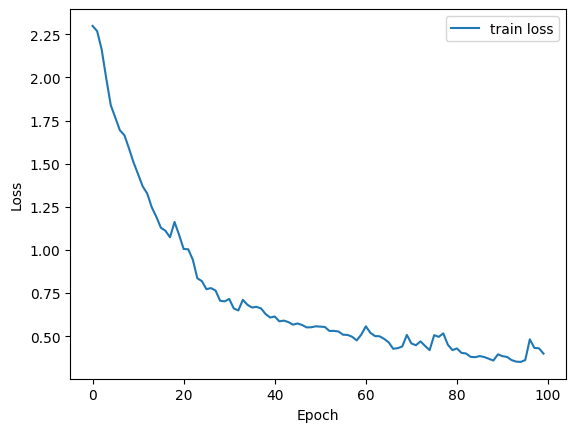

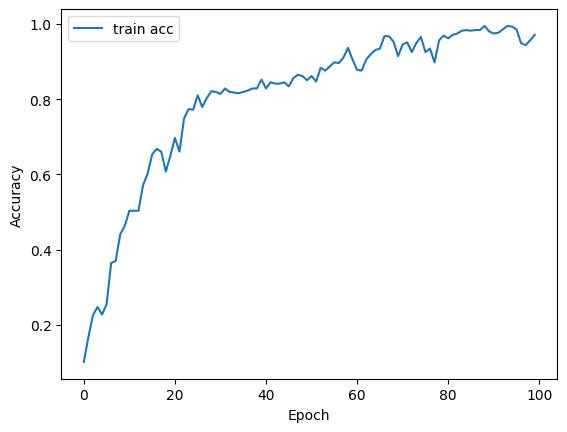

In [177]:
import matplotlib.pyplot as plt

def plot_history(history):
    # plot training & validation loss
    plt.figure()
    plt.plot(history.history['loss'], label='train loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    # plot training & validation accuracy
    plt.figure()
    plt.plot(history.history['categorical_accuracy'], label='train acc')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

# after fitting:
# history = model.fit( ... , validation_data=..., epochs=...)
plot_history(history)


In [178]:
print(X_train.shape)
print(y_train.shape)


(548, 32, 1662)
(548, 10)


In [179]:
model.summary()

Model: "functional_11"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                  ┃ Output Shape              ┃         Param # ┃ Connected to               ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_6 (InputLayer)    │ (None, 32, 1662)          │               0 │ -                          │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_13        │ (None, 32, 1662)          │           3,324 │ input_layer_6[0][0]        │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_6               │ (None, 32, 256)           │       1,833,984 │ layer_normalization_13[0]… │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ layer_normalization_14        │ (None, 32, 256)           │             512 │ bidirectional_6[0][0]      │
│ (LayerNormalization)          │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ bidirectional_7               │ (None, 32, 256)           │         394,240 │ layer_normalization_14[0]… │
│ (Bidirectional)               │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_18 (Dense)              │ (None, 32, 1)             │             257 │ bidirectional_7[0][0]      │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ softmax_2 (Softmax)           │ (None, 32, 1)             │               0 │ dense_18[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ multiply_2 (Multiply)         │ (None, 32, 256)           │               0 │ bidirectional_7[0][0],     │
│                               │                           │                 │ softmax_2[0][0]            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ global_average_pooling1d_3    │ (None, 256)               │               0 │ multiply_2[0][0]           │
│ (GlobalAveragePooling1D)      │                           │                 │                            │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_19 (Dense)              │ (None, 128)               │          32,896 │ global_average_pooling1d_… │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dropout_8 (Dropout)           │ (None, 128)               │               0 │ dense_19[0][0]             │
├───────────────────────────────┼───────────────────────────┼─────────────────┼────────────────────────────┤
│ dense_20 (Dense)              │ (None, 10)                │           1,290 │ dropout_8[0][0]            │
└───────────────────────────────┴───────────────────────────┴─────────────────┴────────────────────────────┘

 Total params: 6,799,511 (25.94 MB)

 Trainable params: 2,266,503 (8.65 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 4,533,008 (17.29 MB)

In [180]:
res = model.predict(X_test)

5/5 ━━━━━━━━━━━━━━━━━━━━ 3s 435ms/step


In [181]:
print(X_test)
print(len(X_test))

[[[ 0.5076474   0.31823868 -0.47841775 ...  0.25064579  0.38609409
   -0.05453568]
  [ 0.50737596  0.32091135 -0.61306381 ...  0.25244907  0.38571554
   -0.0736986 ]
  [ 0.50818437  0.31992561 -0.5786981  ...  0.25129962  0.38462937
   -0.08350859]
  ...
  [ 0.53649825  0.32437068 -1.07950664 ...  0.          0.
    0.        ]
  [ 0.53747672  0.32344848 -0.95292282 ...  0.          0.
    0.        ]
  [ 0.53839344  0.3223201  -0.9189803  ...  0.          0.
    0.        ]]

 [[ 0.5429374   0.33171898 -0.96980852 ...  0.          0.
    0.        ]
  [ 0.55286807  0.33722812 -0.91440535 ...  0.          0.
    0.        ]
  [ 0.56707209  0.34173715 -0.90968585 ...  0.          0.
    0.        ]
  ...
  [ 0.55488628  0.32801932 -0.7708388  ...  0.          0.
    0.        ]
  [ 0.55819356  0.33092499 -0.78678554 ...  0.          0.
    0.        ]
  [ 0.55544168  0.32883328 -0.76982337 ...  0.          0.
    0.        ]]

 [[ 0.47692293  0.35110486 -0.52538729 ...  0.          0.
 

In [182]:
actions[np.argmax(res[0])]

'hospital'

In [183]:
actions[np.argmax(y_test[0])]

'hospital'

In [184]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [185]:
yhat = model.predict(X_test)
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()
multilabel_confusion_matrix(ytrue, yhat)

5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 127ms/step


array([[[121,   0],
        [  0,  17]],

       [[135,   0],
        [  0,   3]],

       [[122,   0],
        [  0,  16]],

       [[124,   0],
        [  0,  14]],

       [[121,   0],
        [  0,  17]],

       [[123,   0],
        [  0,  15]],

       [[122,   0],
        [  0,  16]],

       [[120,   0],
        [  1,  17]],

       [[125,   1],
        [  0,  12]],

       [[128,   0],
        [  0,  10]]], dtype=int64)

In [186]:
accuracy_score(ytrue, yhat)

0.9927536231884058

In [187]:
for num, prob in enumerate(res):
    print(f"prob[{num}] type: {type(prob)}, shape: {getattr(prob, 'shape', 'scalar')}")


prob[0] type: <class 'numpy.ndarray'>, shape: (10,)
prob[1] type: <class 'numpy.ndarray'>, shape: (10,)
prob[2] type: <class 'numpy.ndarray'>, shape: (10,)
prob[3] type: <class 'numpy.ndarray'>, shape: (10,)
prob[4] type: <class 'numpy.ndarray'>, shape: (10,)
prob[5] type: <class 'numpy.ndarray'>, shape: (10,)
prob[6] type: <class 'numpy.ndarray'>, shape: (10,)
prob[7] type: <class 'numpy.ndarray'>, shape: (10,)
prob[8] type: <class 'numpy.ndarray'>, shape: (10,)
prob[9] type: <class 'numpy.ndarray'>, shape: (10,)
prob[10] type: <class 'numpy.ndarray'>, shape: (10,)
prob[11] type: <class 'numpy.ndarray'>, shape: (10,)
prob[12] type: <class 'numpy.ndarray'>, shape: (10,)
prob[13] type: <class 'numpy.ndarray'>, shape: (10,)
prob[14] type: <class 'numpy.ndarray'>, shape: (10,)
prob[15] type: <class 'numpy.ndarray'>, shape: (10,)
prob[16] type: <class 'numpy.ndarray'>, shape: (10,)
prob[17] type: <class 'numpy.ndarray'>, shape: (10,)
prob[18] type: <class 'numpy.ndarray'>, shape: (10,)
pro

In [188]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res[:len(actions)]):  # Avoid overflow
        prob = float(np.asarray(prob).squeeze())
        color = colors[num % len(colors)]  # Wrap around just in case
        cv2.rectangle(output_frame, (0, 60 + num * 40), (int(prob * 100), 90 + num * 40), color, -1)
        cv2.putText(output_frame, actions[num], (0, 85 + num * 40), 
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
    return output_frame




In [189]:
plt.figure(figsize=(18,18))
plt.imshow(prob_viz(res, actions, image, colors))

TypeError: only length-1 arrays can be converted to Python scalars

<Figure size 1800x1800 with 0 Axes>

In [190]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [1]:
import cv2
import mediapipe as mp

# Initialize mediapipe
mp_drawing = mp.solutions.drawing_utils
mp_pose = mp.solutions.pose

# Load your image
image = cv2.imread('03_02_0092_(28_11_16_15_52_50)_c_0038.jpg')  # Replace with your image path
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Initialize Pose
with mp_pose.Pose(static_image_mode=True) as pose:
    results = pose.process(image_rgb)

    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_pose.POSE_CONNECTIONS,
            landmark_drawing_spec=mp_drawing.DrawingSpec(color=(255,255,255), thickness=2, circle_radius=2),
            connection_drawing_spec=mp_drawing.DrawingSpec(color=(0,255,0), thickness=2)
        )

# Show result
# Show result
cv2.imshow('Skeleton', image)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [198]:
def predict_from_video(video_path):
    cap = cv2.VideoCapture(video_path)
    sequence = []

    with mp_holistic.Holistic(static_image_mode=True) as holistic:
        while cap.isOpened() and len(sequence) < 30:
            ret, frame = cap.read()
            if not ret:
                break
            results = holistic.process(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
            print(results.left_hand_landmarks, results.right_hand_landmarks)
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)

    cap.release()

    if len(sequence) < 30:
        return "Not enough frames", None, None  # ✅ FIXED HERE

    sequence_np = np.expand_dims(sequence, axis=0)
    prediction = model.predict(sequence_np)[0]
    word = actions[np.argmax(prediction)]
    prob = prediction[np.argmax(prediction)]
    return word, prob, prediction  # ✅ FIXED HERE


In [199]:
import matplotlib.pyplot as plt

def visualize_prediction(prediction, actions):
    plt.figure(figsize=(10, 5))
    plt.bar(actions, prediction, color='skyblue')
    plt.xlabel("Predicted Word")
    plt.ylabel("Probability")
    plt.title("Prediction Confidence for Each Word")
    plt.xticks(rotation=45)
    plt.ylim([0, 1])
    plt.grid(axis='y')
    plt.tight_layout()
    plt.show()


In [200]:
def predict_from_video(path, model, actions, seq_len=30, flip_try=True):
    import cv2, numpy as np, mediapipe as mp
    mp_holistic = mp.solutions.holistic

    def process(cap, do_flip=False):
        seq, probs_list = [], []
        with mp_holistic.Holistic(min_detection_confidence=0.5,
                                  min_tracking_confidence=0.5) as hol:
            while True:
                ret, frame = cap.read()
                if not ret: break
                if do_flip: frame = cv2.flip(frame, 1)  # mirror option
                # keep same preprocessing as training
                image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                image.flags.writeable = False
                results = hol.process(image)
                key = extract_keypoints(results)          # same function as training
                seq.append(key.astype(np.float32))
        if len(seq) == 0: 
            return None, None
        # make windows
        X = []
        if len(seq) < seq_len:
            # repeat edge frames to reach seq_len
            pad = [seq[-1]] * (seq_len - len(seq))
            X.append(np.array(seq + pad))
        else:
            for s in range(0, len(seq) - seq_len + 1, 5):  # stride 5
                X.append(np.array(seq[s:s+seq_len]))
        X = np.stack(X, axis=0)
        # predict
        p = model.predict(X, verbose=0)
        return p.mean(axis=0), p

    cap = cv2.VideoCapture(path)
    p1, _ = process(cap, do_flip=False)
    cap.release()

    if flip_try:
        cap = cv2.VideoCapture(path)
        p2, _ = process(cap, do_flip=True)
        cap.release()
    else:
        p2 = None

    if p1 is None and p2 is None:
        return "Too short", 0.0, None

    probs = p1 if (p2 is None or p1.max() >= p2.max()) else p2
    idx = int(np.argmax(probs))
    pred = actions[idx]
    conf = float(probs[idx])
    # optional confidence gate
    if conf < 0.6:
        pred = "unknown"
    return pred, conf, probs


Predicted: muscle
Confidence: 0.9221062064170837


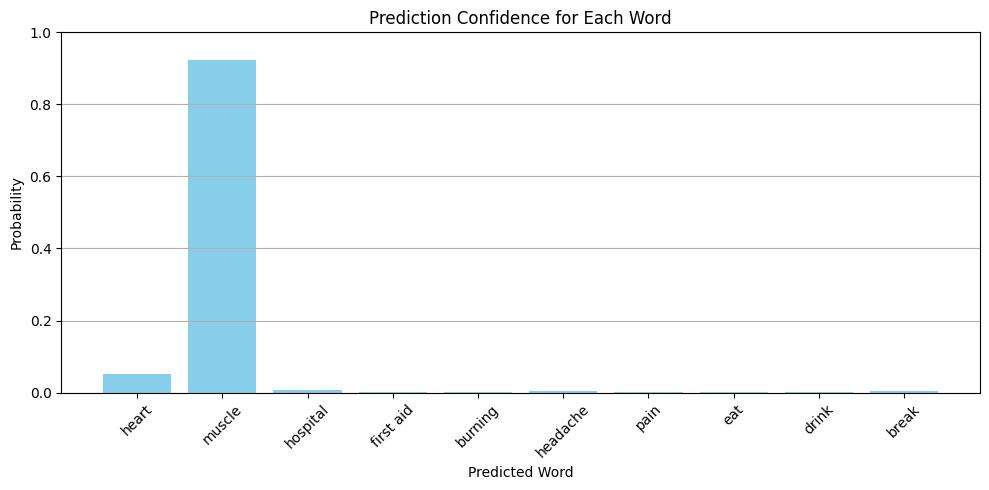

In [201]:
  # Change to your trained labels

video_path = 'WIN_20250808_21_41_13_Pro.mp4'  # Your video path

pred_word, prob, full_res = predict_from_video(video_path, model, actions)

print("Predicted:", pred_word)
print("Confidence:", prob)
visualize_prediction(full_res,actions)

In [195]:
def predict_from_frame_folder(frame_folder, model, actions, sequence_length=30, threshold=0.5):
    frame_files = sorted([
        os.path.join(frame_folder, f)
        for f in os.listdir(frame_folder)
        if f.endswith(('.jpg', '.png'))
    ])

    sequence = []
    
    with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        for frame_file in frame_files:
            frame = cv2.imread(frame_file)
            if frame is None:
                continue
            
            image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
            image.flags.writeable = False
            results = holistic.process(image)
            keypoints = extract_keypoints(results)
            sequence.append(keypoints)

    sequence = sequence[-sequence_length:]
    if len(sequence) < sequence_length:
        return "Too short", 0.0, None

    input_sequence = np.expand_dims(sequence, axis=0)
    res = model.predict(input_sequence)[0]
    
    if res.max() < threshold:
        return "Uncertain", res.max(), res

    predicted_word = actions[np.argmax(res)]
    return predicted_word, res[np.argmax(res)], res


In [196]:
def test_dataset_from_frames(root_dir, model, actions, sequence_length=30, threshold=0.5):
    total = 0
    correct = 0
    
    for label in os.listdir(root_dir):
        label_path = os.path.join(root_dir, label)
        if not os.path.isdir(label_path):
            continue

        for sample in os.listdir(label_path):
            sample_path = os.path.join(label_path, sample)
            if not os.path.isdir(sample_path):
                continue

            pred, prob, _ = predict_from_frame_folder(sample_path, model, actions, sequence_length, threshold)
            print(f"Sample: {sample} | Actual: {label} | Predicted: {pred} | Confidence: {prob:.2f}")
            
            total += 1
            if pred == label:
                correct += 1

    print(f"\nTotal: {total} | Correct: {correct} | Accuracy: {correct / total:.2%}")


In [197]:
test_dataset_from_frames('test', model, actions)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 112ms/step
Sample: 03_02_0172_(16_11_17_00_57_23)_c | Actual: break | Predicted: break | Confidence: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
Sample: 03_02_0093_(12_12_16_16_50_09)_c | Actual: first aid | Predicted: burning | Confidence: 0.97
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 131ms/step
Sample: 03_03_0093_(15_12_16_17_39_21)_c | Actual: first aid | Predicted: first aid | Confidence: 0.97
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 125ms/step
Sample: 03_03_0093_(15_12_16_17_39_50)_c | Actual: first aid | Predicted: first aid | Confidence: 0.67
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
Sample: 03_03_0093_(15_12_16_17_40_43)_c | Actual: first aid | Predicted: first aid | Confidence: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
Sample: 03_03_0093_(20_12_16_17_46_03)_c | Actual: first aid | Predicted: first aid | Confidence: 0.98
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
Sample: 03_02_0115_(19_12_16_15_51_40)_c | Actual: headache | Predicted: headache | Confidence: 0.85
1/1 ━━━━━━━━━━━━━━